# K-Means Clustering

목적 : 데이터 내의 패턴을 찾기 위함 = dependant variable을 만들 수 있음

## Importing the libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

- X에서

  Anual Income과 Spending Score만 사용하여 cluster를 만들예정임

In [8]:
dataset = pd.read_csv('Mall_Customers.csv')
# iloc에서 특정 열을 선택하는 방법 dataset.iloc[:, [3,4]]
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

Elbow method의 Y축에 WCSS를 사용함

Cluster 수가 X축이 됨

- WCSS란?

    Cluster의 각 관찰 포인트(Cluster의 중앙부)들 사이의 거리의 제곱합

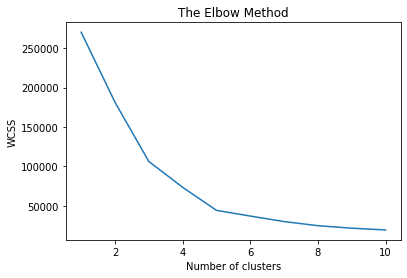

In [9]:
from sklearn.cluster import KMeans
wcss = []
# kmeans algorithm을 10개의 다른 cluster로 돌림
for i in range(1, 11):
  # n_clusters : cluster의 갯수
  # init : random intialize trap을 피하기 위한 장치
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  # keamns.inertia_ : kmeans의 wcss를 반환함
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

cluster 수가 5일때 기울기가 급격하게 줄어들기 때문에 최적 클러스터 수는 5개이다.

## Training the K-Means model on the dataset

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
# KMeans.fit_predict : cluster별로 예측된 dependant variable을 반환함
y_kmeans = kmeans.fit_predict(X)

In [11]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

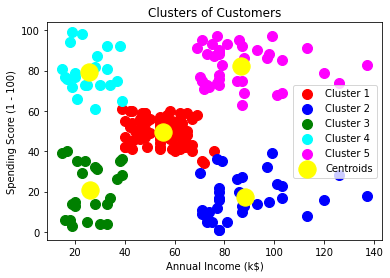

In [13]:
# cluster 0에 해당하는 고객 점찍기
# X축 : annual income
# Y축 : spending score
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()